# Data visualization

In [1]:
import os
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

TODO: fix the right_claw data, because it got out of hand somewhere a bit

## Bad data
- Visualize patterns, identify possible errors (logical or numerical)

In [2]:
!rm -r 2025-tidy-python
!git clone https://github.com/Py-ualg/2025-tidy-python.git

Cloning into '2025-tidy-python'...
remote: Enumerating objects: 657, done.
remote: Counting objects: 100% (657/657), done.
remote: Compressing objects: 100% (634/634), done.
remote: Total 657 (delta 68), reused 584 (delta 20), pack-reused 0 (from 0)
Receiving objects: 100% (657/657), 12.96 MiB | 11.12 MiB/s, done.
Resolving deltas: 100% (68/68), done.


In [3]:
data_tidy_path = '2025-tidy-python/r2py/tidy-data-python/'

In [4]:
crabs = pd.read_parquet(os.path.join(data_tidy_path, 'crabs.parquet'))

In [5]:
crabs.head()

,region,date,species,sex,stage,is_gravid,carapace_width,carapace_length,front_width,left_claw_length,right_claw_length,depth [m],associated_species,behaviour
0,Ria Alvor,2022-01-04,Afruca farensis,NaN,pre_puberty,False,16.179774,19.0,2.0,7.065256,1.249854,8,"['Polychaete Worm', 'Small Fish', 'Crab (Other...",Sitting still blending with environment.
1,Ria Alvor,2022-01-04,Afruca farensis,male,adult,False,17.533657,21.0,5.0,4.131649,6.824946,7,"['Barnacle', 'Sea Urchin', 'Algae', 'Shrimp', ...",Using claws to dig into sediment.
2,Ria Alvor,2022-01-04,Afruca farensis,male,juvenile,False,17.613623,27.0,4.0,3.437135,184.995377,10,"['Small Fish', 'Polychaete Worm']",Rapid crossing of open sand.
3,Ria Alvor,2022-01-04,Afruca farensis,male,juvenile,False,17.073995,28.0,2.0,6.476798,0.421570,8,"['Shrimp', 'Coral Fragment', 'Sea Urchin', 'He...",Climbing seaweed stalks.
4,Ria Alvor,2022-01-04,Uca olhanensis,NaN,sub_adult,False,17.725559,19.0,3.0,5.803654,79.730934,4,['Small Fish'],Exchanging antenna taps.


In [6]:
crabs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22091 entries, 0 to 22090
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   region              22091 non-null  category      
 1   date                22091 non-null  datetime64[ns]
 2   species             22091 non-null  category      
 3   sex                 16136 non-null  category      
 4   stage               22091 non-null  category      
 5   is_gravid           22091 non-null  bool          
 6   carapace_width      22091 non-null  float64       
 7   carapace_length     22091 non-null  float64       
 8   front_width         22091 non-null  float64       
 9   left_claw_length    22091 non-null  float64       
 10  right_claw_length   22091 non-null  float64       
 11  depth [m]           22091 non-null  int64         
 12  associated_species  22091 non-null  object        
 13  behaviour           22091 non-null  object    

### Numerical columns

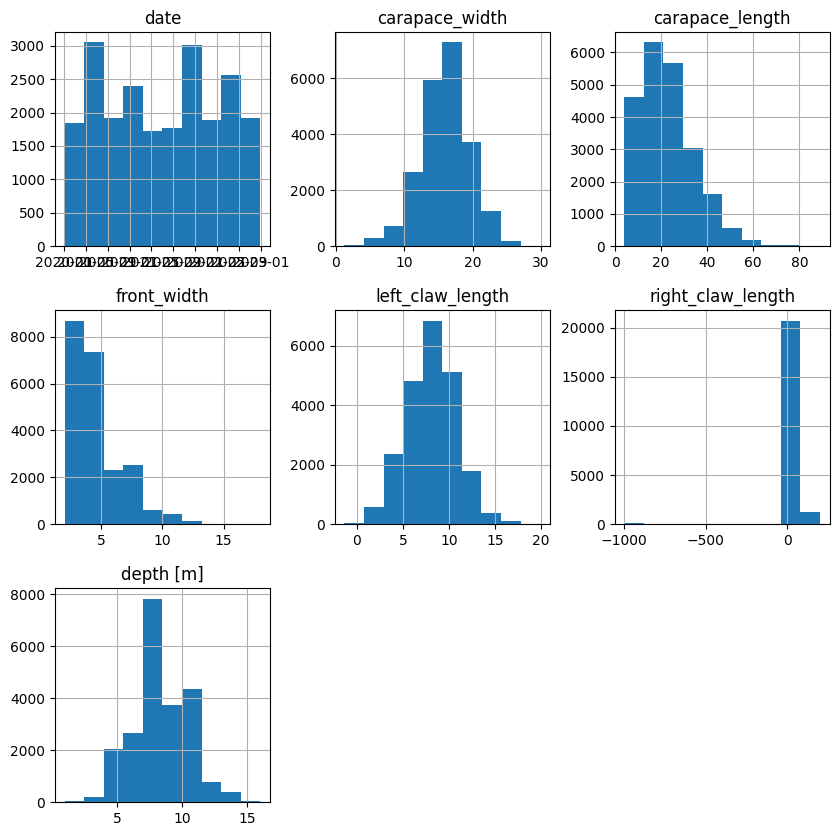

In [7]:
crabs.hist(figsize=(10, 10));

In [8]:
#@title Remove negative values
crabs1 = crabs[crabs['right_claw_length'] > 0]
crabs1 = crabs1[crabs1['left_claw_length'] > 0]
crabs1.shape, crabs.shape


((21966, 14), (22091, 14))

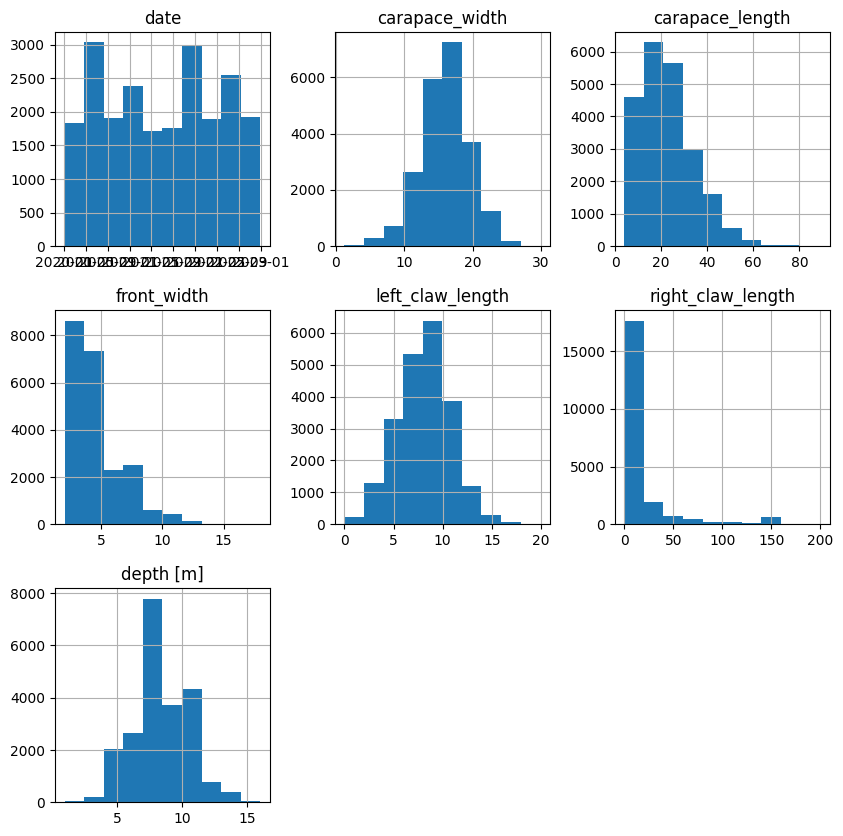

In [9]:
crabs1.hist(figsize=(10, 10));

In [10]:
#@title Reconcile integer vs Float values

# map columns as integers
crabs1 = crabs1.astype({
    'carapace_width': int,
    'carapace_length': int,
    'front_width': int,
    'right_claw_length': int,
    'left_claw_length': int,
})

In [11]:
crabs1.describe()

,date,carapace_width,carapace_length,front_width,left_claw_length,right_claw_length,depth [m]
count,21966,21966.000000,21966.000000,21966.000000,21966.000000,21966.000000,21966.000000
mean,2021-07-05 16:24:11.406719488,15.484704,22.493672,4.483247,7.627925,16.426841,8.107302
min,2020-01-05 00:00:00,1.000000,4.000000,2.000000,0.000000,0.000000,1.000000
25%,2020-09-19 00:00:00,13.000000,14.000000,3.000000,6.000000,1.000000,7.000000
50%,2021-07-15 00:00:00,16.000000,21.000000,4.000000,8.000000,4.000000,8.000000
75%,2022-04-28 00:00:00,18.000000,29.000000,6.000000,9.000000,14.000000,10.000000
max,2022-12-30 00:00:00,29.000000,89.000000,18.000000,19.000000,199.000000,16.000000
std,NaN,3.584220,11.588370,2.131521,2.719349,32.702419,2.108853


#### Extreme values

Is 199 cm for right_claw_length reasonable? What to do?
- cutoff?, drop rows? Where?
- For normal distribution, outlier can be for instance `mean +- 3STD`. This is not Normal distribution, so apply or not apply?
- Other statistical test

In [12]:
#@ Tukey's method
# Compute the interquartile range (IQR): IQR = Q3 - Q1
# Define outliers as values:
#     Below Q1 - 1.5 * IQR
#     Above Q3 + 1.5 * IQR

q1 = crabs1['right_claw_length'].quantile(0.25)
q3 = crabs1['right_claw_length'].quantile(0.75)
iqr = q3 - q1

lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

outliers = crabs1[(crabs1['right_claw_length'] < lower) | (crabs1['right_claw_length'] > upper)]

In [13]:
outliers

,region,date,species,sex,stage,is_gravid,carapace_width,carapace_length,front_width,left_claw_length,right_claw_length,depth [m],associated_species,behaviour
2,Ria Alvor,2022-01-04,Afruca farensis,male,juvenile,False,17,27,4,3,184,10,"['Small Fish', 'Polychaete Worm']",Rapid crossing of open sand.
4,Ria Alvor,2022-01-04,Uca olhanensis,NaN,sub_adult,False,17,19,3,5,79,4,['Small Fish'],Exchanging antenna taps.
5,Ria Alvor,2022-01-04,Afruca farensis,male,sub_adult,True,17,16,5,2,124,9,"['Snail', 'Hermit Crab', 'Algae', 'Sea Sponge'...",Emerging cautiously from hiding.
9,Ria Alvor,2022-01-04,Afruca farensis,male,pre_puberty,False,18,6,2,5,150,8,"['Crab (Other Species)', 'Sea Sponge', 'Small ...",Emerging cautiously from hiding.
13,Ria Alvor,2022-01-04,Afruca farensis,male,adult,False,18,12,3,0,37,6,"['Shrimp', 'Crab (Other Species)', 'Mussel', '...",Moving in groups.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21886,Ria Alvor,2021-07-15,Afruca farensis,male,adult,False,19,9,5,8,150,7,"['Small Fish', 'Polychaete Worm', 'Sea Sponge'...",Escaping predator silhouette overhead.
21932,Ria Alvor,2021-07-15,Afruca farensis,NaN,adult,False,19,16,5,7,95,9,['Small Fish'],Hiding under floating debris.
21954,Ria Alvor,2021-07-15,Afruca farensis,NaN,juvenile,False,20,13,7,6,101,11,"['Coral Fragment', 'Barnacle', 'Hermit Crab', ...",Feeding on algae scraped from rocks.
22021,Ria Alvor,2021-07-15,Afruca farensis,male,juvenile,False,19,29,2,7,68,9,['Sea Urchin'],Picking algae from rock surface.


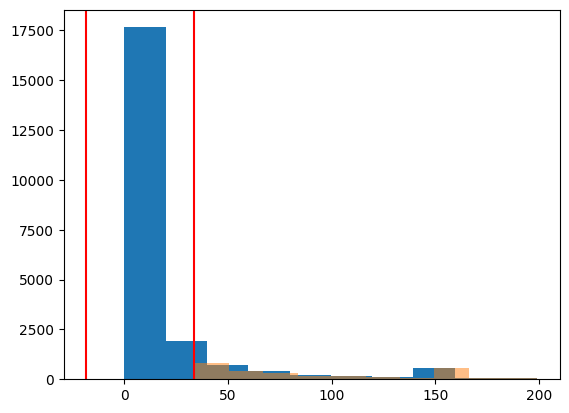

In [14]:
plt.hist(crabs1['right_claw_length'])
plt.axvline(x=lower, color='r')
plt.axvline(x=upper, color='r')
plt.hist(outliers['right_claw_length'], alpha=0.5)
plt.show()

#### Exercise *1*: fix the histogram plot
- set bins + yaxis as *logscale*

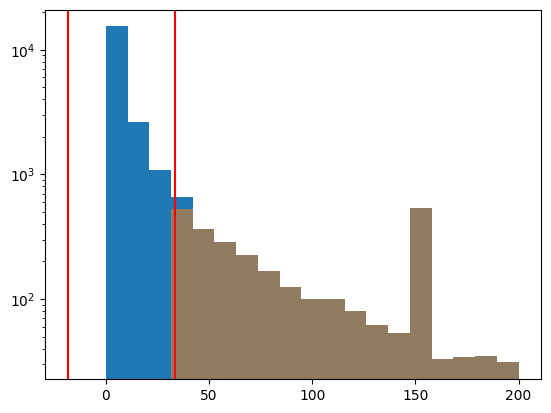

In [15]:
#@title Solution

bins = np.linspace(0, 200, 20)
plt.hist(crabs1['right_claw_length'], bins=bins)
plt.axvline(x=lower, color='r')
plt.axvline(x=upper, color='r')
plt.hist(outliers['right_claw_length'], bins=bins, alpha=0.5)
plt.yscale('log')
plt.show()

#### Exercise 2: make the IQR into a function

In [16]:
#@title Solution
def get_iqr(df: pd.DataFrame, col: str) -> pd.DataFrame:
    """
    Compute the interquartile range (IQR) for a given column in a DataFrame.

    Args:
        df (pandas.DataFrame): The input DataFrame.
        col (str): The name of the column for which to compute the IQR.

    Returns:
        tuple: A tuple containing the lower and upper bounds of the IQR.
    """
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1

    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    outliers = df[(df[col] < lower) | (df[col] > upper)]
    return outliers

In [17]:
def modified_z_score(df: pd.DataFrame, col: str) -> pd.DataFrame:
    """
    Compute the modified z-score for a given column in a DataFrame.

    Args:
        df (pandas.DataFrame): The input DataFrame.
        col (str): The name of the column for which to compute the modified z-score.

    Returns:
        pandas.DataFrame: A new DataFrame with the modified z-score for the specified column.
    """

    x = df[col].dropna()
    median = np.median(x)
    mad = np.median(np.abs(x - median))
    mod_z = 0.6745 * (x - median) / mad

    outliers = df.loc[np.abs(mod_z) > 3.5]
    return outliers

In [18]:
def get_outliers_std(df: pd.DataFrame, col: str, std_cutoff=3) -> pd.DataFrame:
    x = df[col].dropna()
    mean = np.mean(x)
    std = np.std(x)
    outliers = df.loc[np.abs(x - mean) > std_cutoff * std]
    return outliers

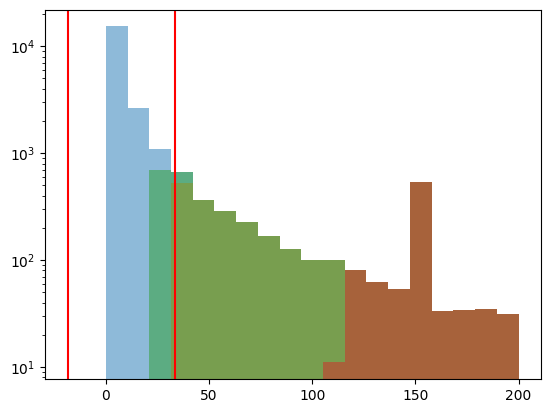

In [19]:
outliers_iqr = get_iqr(crabs1, 'right_claw_length')
outliers_z = modified_z_score(crabs1, 'right_claw_length')
outliers_std = get_outliers_std(crabs1, 'right_claw_length')

bins = np.linspace(0, 200, 20)
plt.hist(crabs1['right_claw_length'], bins=bins, alpha=0.5)
plt.hist(outliers_iqr['right_claw_length'], bins=bins, alpha=0.5)
plt.hist(outliers_z['right_claw_length'], bins=bins, alpha=0.5)
plt.hist(outliers_std['right_claw_length'], bins=bins, alpha=0.5)


plt.axvline(x=lower, color='r')
plt.axvline(x=upper, color='r')
plt.yscale('log')
plt.show()

In [20]:
crabs2 = crabs1.drop(outliers_std.index).reset_index(drop=True)

### Categorical features

In [21]:
#@title What would not make sense?

crabs2[(crabs2['sex'] == 'male') & (crabs2['is_gravid'] == True)]

,region,date,species,sex,stage,is_gravid,carapace_width,carapace_length,front_width,left_claw_length,right_claw_length,depth [m],associated_species,behaviour
10,Ria Alvor,2022-01-04,Afruca farensis,male,pre_puberty,True,17,8,4,5,6,9,['Sea Anemone'],Moving sideways along sandy bottom.
26,Ria Alvor,2022-01-04,Afruca farensis,male,sub_adult,True,17,18,7,4,13,12,['Polychaete Worm'],Crab moving quickly across rocks.
33,Ria Alvor,2022-01-04,Uca olhanensis,male,pre_puberty,True,19,19,5,1,109,8,"['Barnacle', 'Sea Urchin', 'Crab (Other Specie...",Searching for food in tidal pools.
38,Ria Alvor,2022-01-04,Afruca farensis,male,pre_puberty,True,17,22,8,3,5,7,['Sea Anemone'],Hiding in sandy burrow.
43,Ria Alvor,2022-01-04,Uca olhanensis,male,adult,True,16,7,6,7,0,7,"['Small Fish', 'Snail', 'Shrimp']",Vibrating antennae in water currents.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21041,Ria Alvor,2021-07-15,Uca olhanensis,male,adult,True,20,16,5,8,8,7,"['Coral Fragment', 'Sea Urchin', 'Sea Star', '...",Camouflaging with surrounding mud.
21046,Ria Alvor,2021-07-15,Afruca farensis,male,juvenile,True,17,24,4,7,1,6,"['Sea Star', 'Sea Sponge', 'Crab (Other Specie...",Claw snapping in competition.
21052,Ria Alvor,2021-07-15,Afruca farensis,male,pre_puberty,True,20,13,5,8,6,6,"['Small Fish', 'Sea Sponge', 'Sea Star', 'Crab...",Retreating quickly from shadow.
21063,Ria Alvor,2021-07-15,Afruca farensis,male,pre_puberty,True,21,23,7,7,0,12,"['Hermit Crab', 'Sea Urchin', 'Snail', 'Coral ...",Defensive posture when approached.


In [22]:
crabs2['is_gravid'].value_counts()

,count
is_gravid,
False,16950
True,4136


1. First, pregnant males make up to 10% of all the samples,
2. Second even worse, compared to total count, it is the same amount of identified female pregnant.
3. Those are serious flaws which need domain knowledge, discussion with collaborators.

**What is the most correct thing to do for us now?**

In [23]:
crabs2.drop(columns=['is_gravid'], inplace=True)

### Drop NA values

In [24]:
crabs2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21086 entries, 0 to 21085
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   region              21086 non-null  category      
 1   date                21086 non-null  datetime64[ns]
 2   species             21086 non-null  category      
 3   sex                 15392 non-null  category      
 4   stage               21086 non-null  category      
 5   carapace_width      21086 non-null  int64         
 6   carapace_length     21086 non-null  int64         
 7   front_width         21086 non-null  int64         
 8   left_claw_length    21086 non-null  int64         
 9   right_claw_length   21086 non-null  int64         
 10  depth [m]           21086 non-null  int64         
 11  associated_species  21086 non-null  object        
 12  behaviour           21086 non-null  object        
dtypes: category(4), datetime64[ns](1), int64(6), o

In [25]:
crabs2['sex'].value_counts()

,count
sex,
male,10183
female,5209


In [26]:
crabs2['sex'].unique()

[NaN, 'male', 'female']
Categories (2, object): ['female', 'male']

This way we can keep the numerical values, even though the `sex` data is missing for 25% of samples.

## Final data
- now we cleaned and crosscheck the "clean data again"
- You can try to push these step to nb2, where it pertains, however the questions we asked here logically pertain to the greay area with no exact correct answer, so you might want it separate as here.*italicized text*
- Now we really are after **visualization**

### Barplots

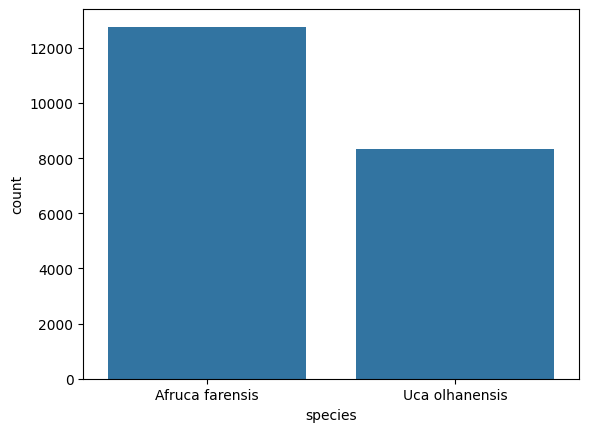

In [27]:
sns.barplot(crabs2['species'].value_counts())
plt.show()

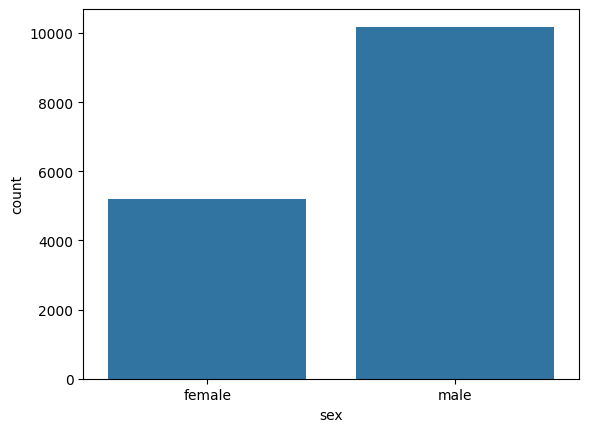

In [28]:
sns.barplot(crabs2['sex'].value_counts(dropna=False))
plt.show()

**Careful**: we set two categories in the previous NB, therefore the NaNs are not appearing on the plot

<Axes: xlabel='sex', ylabel='count'>

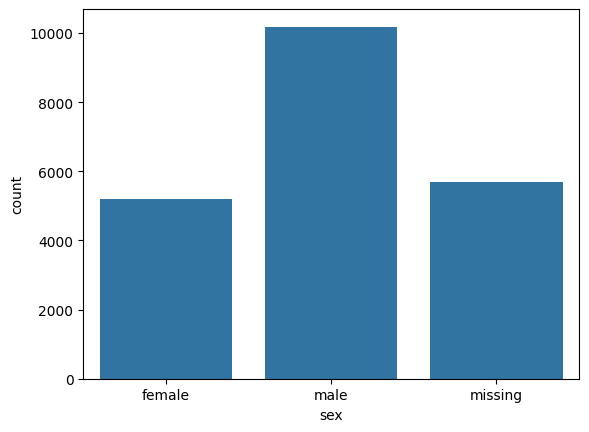

In [29]:
crabs2['sex'] = crabs2['sex'].cat.add_categories('missing').fillna('missing')
sns.countplot(data=crabs2, x='sex')

In [31]:
crabs2['sex'].unique()

['missing', 'male', 'female']
Categories (3, object): ['female', 'male', 'missing']

In [34]:
crabs2['sex'].describe()

,sex
count,21086
unique,3
top,male
freq,10183


#### Exercise:
Can you visually show the crab abundance by species and sex in the same plot?

**R code**

```
nr_crabs_by_sp_sex <- count(crabs2, species, sex)
ggplot(data = nr_crabs_by_sp_sex, mapping = aes(x = species, y = n, fill = sex)) + geom_col()
```

/tmp/ipython-input-38-2839343411.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  nr_crabs_by_sp_sex = crabs3.groupby(['species', 'sex']).size().reset_index(name='n')


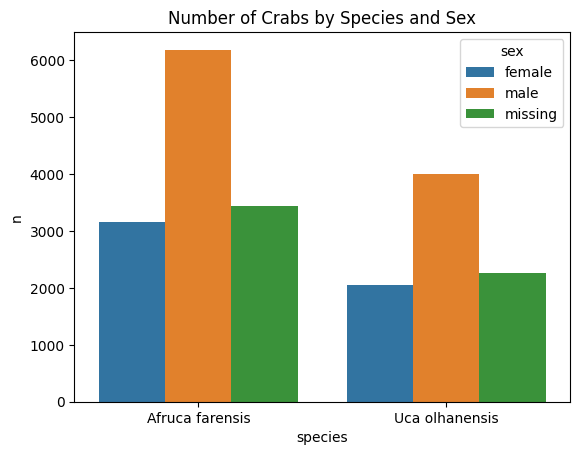

In [38]:
# Count the number of crabs by species and sex
# sns.set_style()
crabs3 = crabs2.copy()
# crabs3['sex'].fillna('Missing', inplace=True)
nr_crabs_by_sp_sex = crabs3.groupby(['species', 'sex']).size().reset_index(name='n')

# Plotting
sns.barplot(data=nr_crabs_by_sp_sex, x='species', y='n', hue='sex')
plt.title('Number of Crabs by Species and Sex')
plt.show()

### Alternative using `catplot`

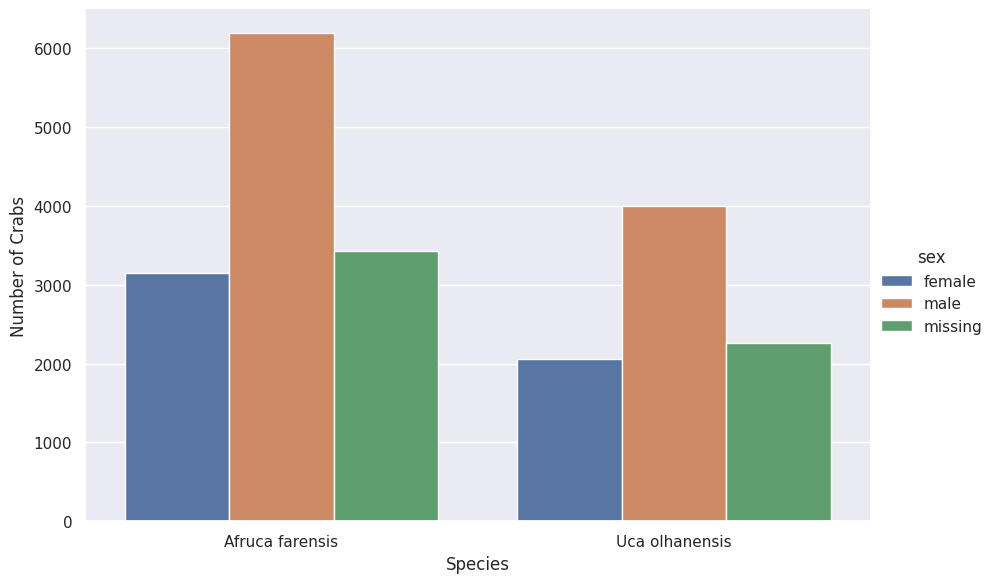

In [40]:
# Plotting with dodge equivalent
sns.set(style="darkgrid")
g = sns.catplot(
    data=nr_crabs_by_sp_sex,
    kind="bar",
    x="species",
    y="n",
    hue="sex",
    dodge=True,
    height=6,
    aspect=1.5
)
g.set_axis_labels("Species", "Number of Crabs")
g.set_titles("Number of Crabs by Species and Sex")
plt.show()

### Subplots
- split to `plt.subplots`
- or here using single command with catplot

**R code**
```
count(crabs, species, stage) %>%
  ggplot(mapping = aes(x = stage, y = n)) +
  geom_col(position = "dodge2") +
  facet_wrap(vars(species))
```

/tmp/ipython-input-51-2638244623.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  nr_crabs_by_sp_sex_stage = crabs3.groupby(['species', 'sex', 'stage']).size().reset_index(name='n')


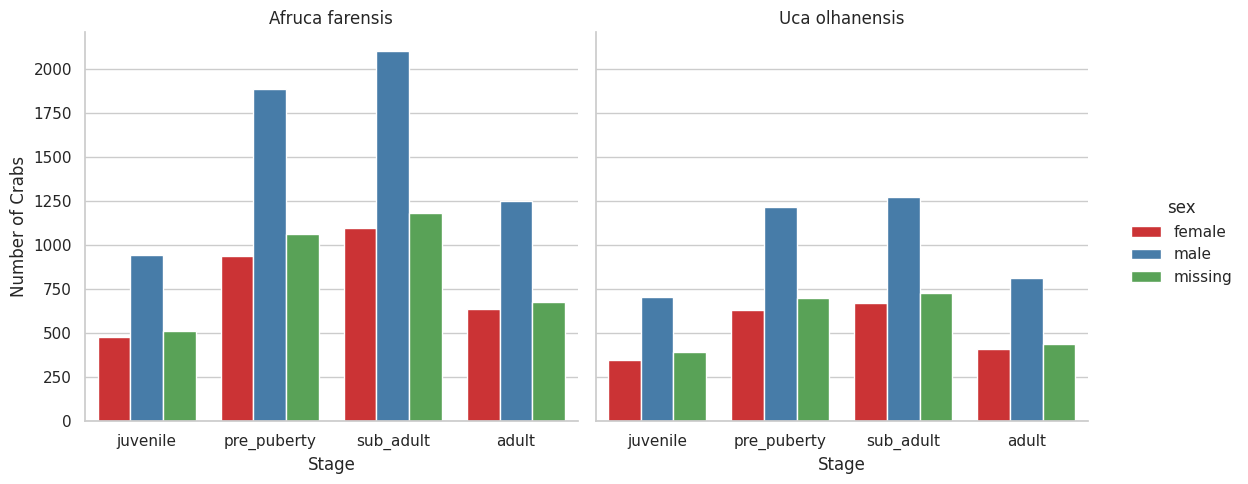

In [51]:
nr_crabs_by_sp_sex_stage = crabs3.groupby(['species', 'sex', 'stage']).size().reset_index(name='n')

# Plotting with dodge equivalent
sns.set(style="whitegrid")
g = sns.catplot(
    data=nr_crabs_by_sp_sex_stage,
    kind="bar",
    x="stage",
    y="n",
    hue="sex",
    palette="Set1",
    col="species",
    col_wrap=2,
    dodge=True,
    height=5,
    aspect=1.
)
g.set_axis_labels("Stage", "Number of Crabs")
g.set_titles(col_template="{col_name}")
sns.move_legend(g, loc='center left', bbox_to_anchor=(1.01, 0.5))
plt.tight_layout()
plt.show()

#### The same but with sex

**R code**
```
ggplot(data = count(crabs3, species, sex, stage), mapping = aes(x = sex, y = n, fill = stage)) +
  geom_col(position = position_dodge2(preserve = "single")) +
  facet_wrap(vars(species))
```

/tmp/ipython-input-50-2716493204.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  nr_crabs_by_sp_sex_stage = crabs3.groupby(['species', 'sex', 'stage']).size().reset_index(name='n')


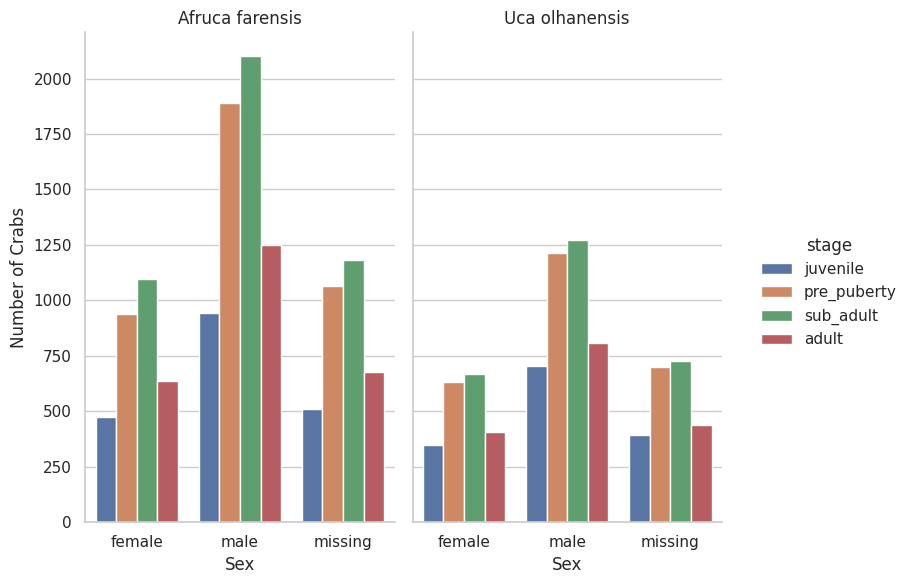

In [50]:
# Count the number of crabs by species, sex, and stage
nr_crabs_by_sp_sex_stage = crabs3.groupby(['species', 'sex', 'stage']).size().reset_index(name='n')

# Plotting with dodge2-like positioning and facet_wrap
sns.set(style="whitegrid")
g = sns.catplot(
    data=nr_crabs_by_sp_sex_stage,
    kind="bar",
    x="sex",
    y="n",
    hue="stage",
    col="species",
    col_wrap=2,
    dodge=True,
    height=6,
    aspect=0.5
)
g.set_axis_labels("Sex", "Number of Crabs")
g.set_titles(col_template="{col_name}")
sns.move_legend(g, loc='center left', bbox_to_anchor=(1.01, 0.5))
plt.tight_layout()
plt.show()

#### Exercise: Convert to percents

In [44]:
# Calculate percentage within each species and season
nr_crabs_by_sp_sex_stage_season['pct'] = (
    nr_crabs_by_sp_sex_stage_season.groupby(['species', 'season'])['n']
    .transform(lambda x: 100 * x / x.sum())
)

/tmp/ipython-input-49-4061988563.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  nr_crabs_by_sp_sex_stage = crabs3.groupby(['species', 'sex', 'stage']).size().reset_index(name='n')
/tmp/ipython-input-49-4061988563.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  nr_crabs_by_sp_sex_stage.groupby(['species'])['n']


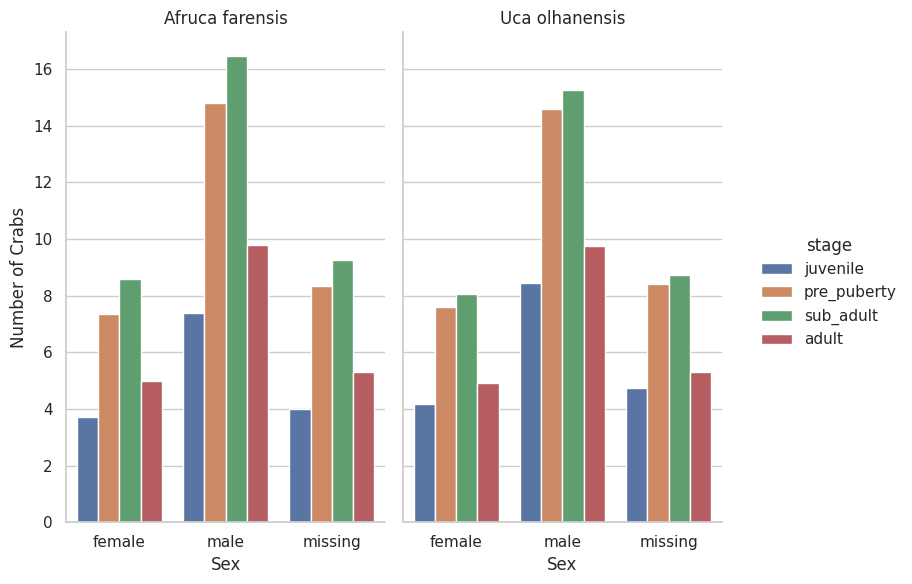

In [49]:
# Count the number of crabs by species, sex, and stage
nr_crabs_by_sp_sex_stage = crabs3.groupby(['species', 'sex', 'stage']).size().reset_index(name='n')

nr_crabs_by_sp_sex_stage['pct'] = (
    nr_crabs_by_sp_sex_stage.groupby(['species'])['n']
    .transform(lambda x: 100 * x / x.sum())
)

# Plotting with dodge2-like positioning and facet_wrap
sns.set(style="whitegrid")
g = sns.catplot(
    data=nr_crabs_by_sp_sex_stage,
    kind="bar",
    x="sex",
    y="pct",
    hue="stage",
    col="species",
    col_wrap=2,
    dodge=True,
    height=6,
    aspect=0.5
)
g.set_axis_labels("Sex", "Number of Crabs")
g.set_titles(col_template="{col_name}")
sns.move_legend(g, loc='center left', bbox_to_anchor=(1.01, 0.5))
plt.tight_layout()
plt.show()

## More plot types

### violin

**R code**
```
crabs3 %>%
  drop_na(sex) %>%
  ggplot(mapping = aes(x = stage, y = carapace_width, fill = sex)) +
  geom_violin()
```

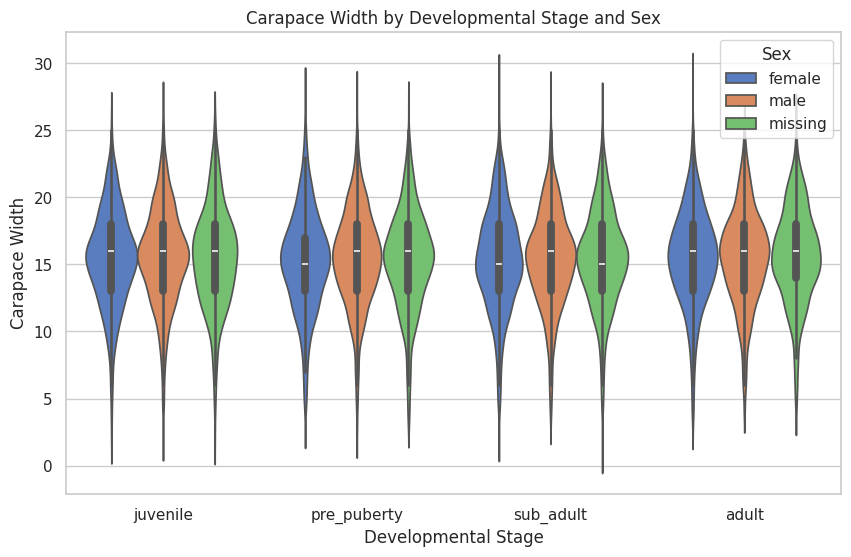

In [52]:
# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.violinplot(data=crabs3, x='stage', y='carapace_width', hue='sex',
               # split=True,
               palette='muted')

# Customize the plot
plt.xlabel('Developmental Stage')
plt.ylabel('Carapace Width')
plt.title('Carapace Width by Developmental Stage and Sex')
plt.legend(title='Sex')
plt.show()

### Density
**R code**

```
crabs3 %>%
  ggplot(mapping = aes(x = carapace_width, fill = sex)) +
  geom_density(alpha=0.8)
```

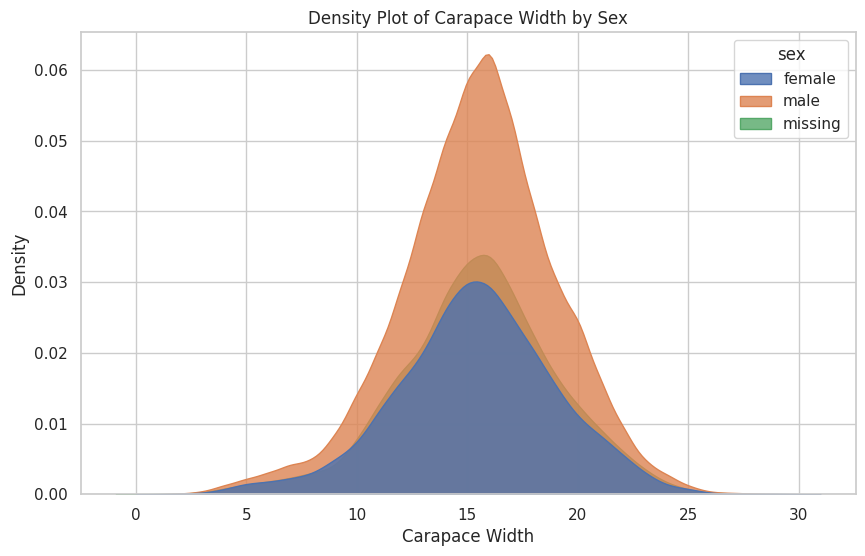

In [53]:
# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.kdeplot(data=crabs3, x='carapace_width', hue='sex', fill=True, alpha=0.8)

# Customize the plot
plt.xlabel('Carapace Width')
plt.ylabel('Density')
plt.title('Density Plot of Carapace Width by Sex')
plt.show()

### Histogram

**R code**

```
crabs3 %>%
  ggplot(mapping = aes(x = carapace_width, fill = sex, col = sex)) +
  geom_histogram(alpha=0.8, position = 'identity')
```

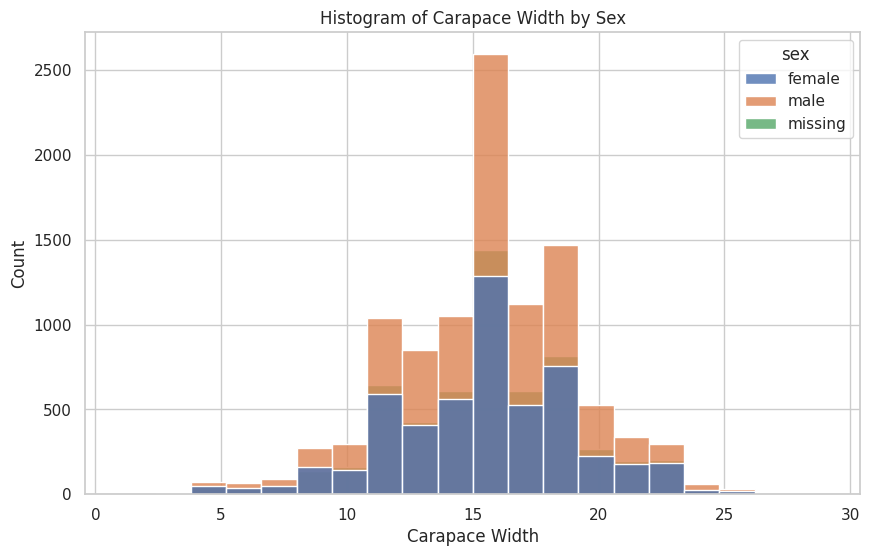

In [57]:
# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=crabs3, x='carapace_width', hue='sex', fill=True, alpha=0.8, bins=20)

# Customize the plot
plt.xlabel('Carapace Width')
plt.ylabel('Count')
plt.title('Histogram of Carapace Width by Sex')
plt.show()

### Boxplot

**R code**

```
crabs3 %>%
  ggplot(mapping = aes(y = carapace_width, fill = sex)) +
  geom_boxplot()
```

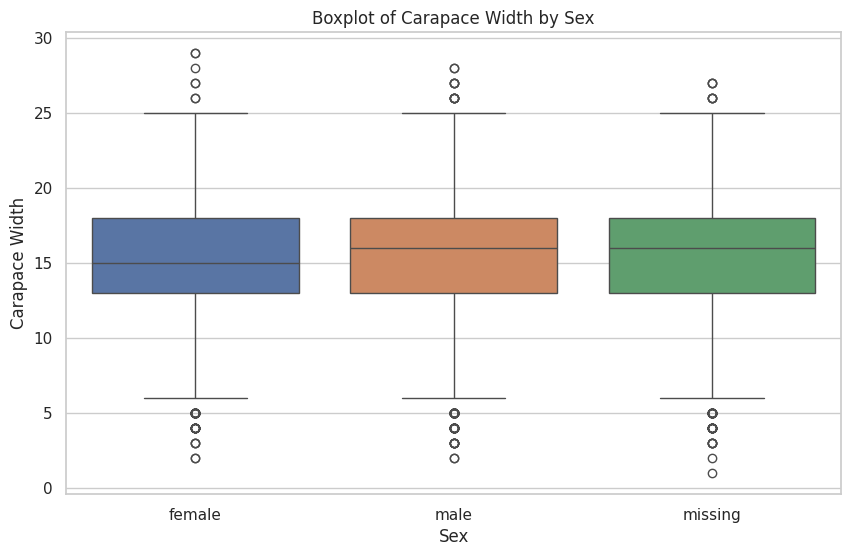

In [58]:
# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(data=crabs3, y='carapace_width', x='sex', hue='sex', fill=True)

# Customize the plot
plt.ylabel('Carapace Width')
plt.xlabel('Sex')
plt.title('Boxplot of Carapace Width by Sex')
plt.show()

### Scatter plot

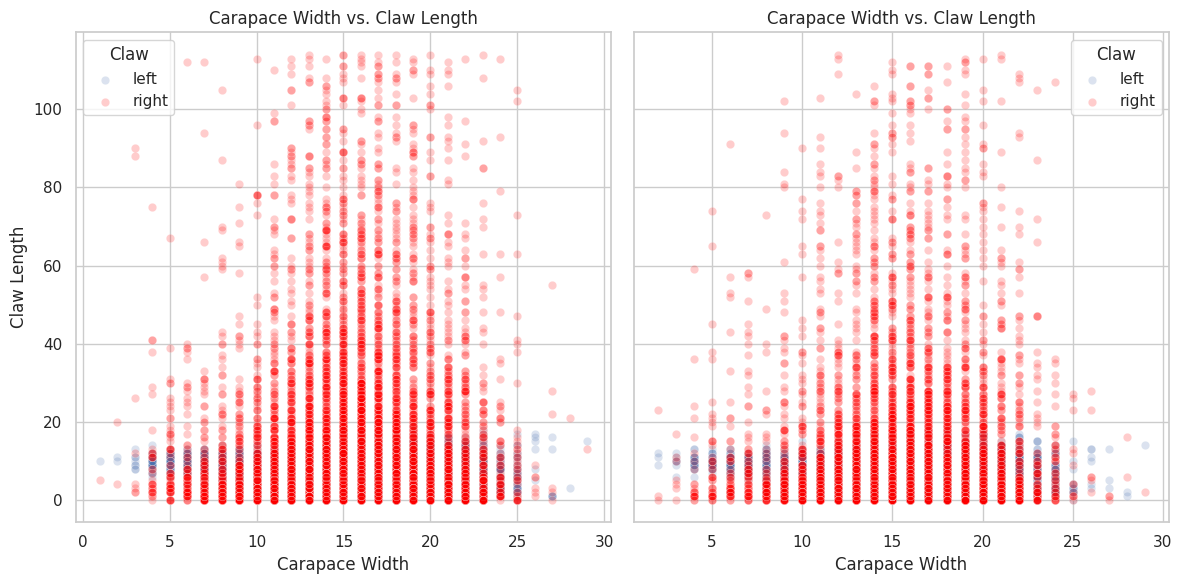

In [60]:
# Create three separate plots using matplotlib and seaborn
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Plot 1: carapace_width vs. left_claw_length
# sns.scatterplot(data=crabs, x='carapace_width', y='left_claw_length',
#                 hue='species', palette='tab10', alpha=0.2, ax=axes[0])
sns.scatterplot(data=crabs3[crabs3['species']=='Afruca farensis'],
                x='carapace_width', y='left_claw_length',
                alpha=0.2, ax=axes[0], label='left')
sns.scatterplot(data=crabs3[crabs3['species']=='Afruca farensis'],
                x='carapace_width', y='right_claw_length',
                alpha=0.2, ax=axes[0], color='red', label='right')

axes[0].set_title('Carapace Width vs. Claw Length')
axes[0].set_xlabel('Carapace Width')
axes[0].set_ylabel('Claw Length')
axes[0].legend(title='Claw')

# Plot 2: carapace_width vs. right_claw_length
sns.scatterplot(data=crabs3[crabs3['species']=='Uca olhanensis'],
                x='carapace_width', y='left_claw_length',
                alpha=0.2, ax=axes[1], label='left')
sns.scatterplot(data=crabs3[crabs3['species']=='Uca olhanensis'],
                x='carapace_width', y='right_claw_length',
                alpha=0.2, ax=axes[1], color='red', label='right')
axes[1].set_title('Carapace Width vs. Claw Length')
axes[1].set_xlabel('Carapace Width')
axes[1].set_ylabel('Claw Length')
axes[1].legend(title='Claw')

# Adjust layout
plt.tight_layout()
plt.show()